__Sean Tulin__
<br>
Date: Jan. 12, 2021
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 1: Error propagation via random sampling</font></center>

## <font color=#46769B>Introduction:</font>

Our goals for this notebook are:
- Practice with sampling from normal distributions.
- Practice some basics of using `numpy` and `matplotlib.pyplot`.
- Learn a new technique for propagation of errors.

Required reading:
- *Lesson 1: Normal distributions*

## <font color=#46769B>Error propagation:</font>

In lab courses, it is standard practice to do error propagation. For example, suppose you have two measured quantities $A,B$. That is, you have their mean values $\langle A \rangle$, $\langle B\rangle$, and their uncertainties $\Delta A,\Delta B$. 
Now suppose you want to calculate the mean and error for a new quantity $C = f(A,B)$ that is a function of $A,B$. What do you do?
- Take the mean to be $\langle C \rangle = f(\langle A \rangle, \langle B \rangle)$. But you may wonder: is this an approximation or is it always true? 
- Calculate the error $\Delta C$ using the rules for error propagation. How straightforward this is depends on how complex $f$ is (and how well one remembers the rules).

Random sampling is another way to approach this problem. There is just one procedure to remember.
- Generate random samples for $A$ and $B$. That is, you generate a list of $N$ values for each quantity<font color=red>$^1$</font>
$$\left(A_0, A_1, ..., A_{N-1}\right) \, ,  \qquad \left(B_0, B_1, ..., B_{N-1}\right)\, .$$
- For every pair $A_i, B_i$, compute $C_i = f(A_i, B_i)$ to generate samples for $C$:
$$\left(C_0, C_1, ..., C_{N-1}\right)\, .$$
- Using your samples for $C$, calculate the mean value $\langle C \rangle$ and standard deviation for $\Delta C$.

There are two things to keep in mind:
- $N$ must be large enough so that your values for $\langle C \rangle$ and $\Delta C$ converge, i.e., you get the same result (up to significant figures) for multiple simulations.
- How you sample quantities $A,B$ is up to you. A normal distribution is typically *default* assumption for how to sample, especially if the errors quoted for $A,B$ are *random* or *statitistical* errors.<font color=red>$^2$</font> But you can sample in a different way if you have more information about the problem, or if you want to include systematic errors (we will see an example below).

### <font color=#46769B>Footnotes:</font>

<font color=red>$^1$</font> Note since Python counting starts at zero, I will follow the same numbering conventions though it looks a bit messier.

<font color=red>$^2$</font> *Random* errors are due to the fact that repeated measurements will not give exactly the same results each time, due to unpredictable differences in the measurement setup or observer. This is why one performs multiple measurements and averages over them. For example, you measure a length with a ruler and get ten slightly different numbers each time. In contrast, *systematic* errors are errors that are the same for all measurements. For example, suppose your ruler is of poor quality and all lengths skewed too short by 5\%.


## <font color=#46769B>Part 1: Pendulum</font>

The standard formula for the oscillation period of a pendulum is
$$T = 2\pi \sqrt{L/g}$$
where $g$ is the gravitational acceleration and $L$ is the length of the pendulum. Suppose we have measured the period and length of the pendulum to be:
$$T = 1.835 \pm 0.005 \; {\rm s} \, , \qquad L = 0.855 \pm 0.002 \; {\rm m} \, .$$

### <font color=#46769B>Part (1a)</font>
Using random sampling for $T$ and $L$, determine $g$, with a sample size of $N=100$.
- Assume the errors quoted for $T$ and $L$ are random errors and generate samples using a normal distribution.
- Determine both the mean $\langle g \rangle$ and uncertainty $\Delta g$. Write *your own* code for calculating the mean and standard deviations for your samples for $g$ and verify that it agrees with what you get using `numpy.mean` and `numpy.std`.
- Plot a histogram for your samples for $g$.

### <font color=#46769B>Part (1b)</font>
- Repeat part (a) for a larger value of $N$ where your results have converged.
- Compare your histogram for $g$ to a normal distribution of mean $\mu=\langle g \rangle$ and standard deviation $\sigma = \Delta g$. (Make a plot of the normal distribution on top of the histogram.)

### <font color='darkred'>Solution to part (1a):</font>

<font color='darkred'>Here is the short version. For a step-by-step solution, which each step explained, see below.</font>

my mean and std dev are: 10.017596823532067 0.06570593968765785
numpy mean and std dev are: 10.017596823532068 0.06570593968760668


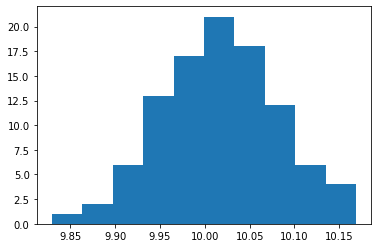

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate num samples for L and T
num = 100
L_arr = np.random.normal(0.855,0.002,num)
T_arr = np.random.normal(1.835,0.005,num)

# Compute samples for g
g_arr = 4*np.pi**2 * L_arr/T_arr**2

# Comute mean and std dev (using my own code)
mymean = sum(g_arr)/num
mystd = np.sqrt(sum(g_arr**2 - mymean**2)/num)

print("my mean and std dev are:", mymean, mystd)

# Compute mean and std dev using numpy built-in functions
print("numpy mean and std dev are:", np.mean(g_arr), np.std(g_arr))

# Make histogram (default 10 bins looks fine)
plt.hist(g_arr)
plt.show()

### <font color='darkred'>Solution to part (1a) step-by-step:</font>

<font color='darkred'>Step 1: Generate samples for $T$ and $L$. Here I print them out so you can see what you got.</font>

In [2]:
# Step 1: Generate N=100 samples for L and T

import numpy as np
import matplotlib.pyplot as plt

# Generate num samples for L
num = 100
L_arr = np.random.normal(0.855,0.002,num)

# Generate num samples for T
T_arr = np.random.normal(1.835,0.005,num)

print("Samples for L are:", L_arr)

print("Samples for T are:", T_arr)

Samples for L are: [0.85770523 0.8556576  0.85537734 0.85715071 0.85378885 0.85684318
 0.84948028 0.85622383 0.85864049 0.8562707  0.85264056 0.85402451
 0.85392003 0.85702899 0.85136322 0.85593354 0.85651281 0.85484992
 0.85479673 0.85481153 0.85492491 0.85146533 0.85259659 0.85495497
 0.85650188 0.85977411 0.85423616 0.85471674 0.85351034 0.85400939
 0.85381786 0.85580936 0.85495126 0.85500695 0.85645412 0.85914089
 0.85785237 0.854865   0.8588002  0.85636433 0.85472448 0.85196707
 0.85766764 0.85496002 0.85149801 0.85671694 0.85525233 0.85804624
 0.85520608 0.85530641 0.85679285 0.85377228 0.85458405 0.85328688
 0.85194124 0.85564168 0.85354236 0.85580865 0.8548511  0.85385342
 0.85743161 0.85359935 0.85529417 0.85057511 0.85481531 0.85345824
 0.85589922 0.85829466 0.86004105 0.8564263  0.85597123 0.85592177
 0.85315831 0.85256019 0.8549914  0.85272141 0.8556454  0.85440169
 0.85454861 0.85721229 0.85518268 0.85526374 0.85467504 0.85186705
 0.85309815 0.85594182 0.85468244 0.8543008

<font color='darkred'>Step 2: Calculate samples for $g$.</font>

<font color='darkred'>To be clear, the goal is to *measure $g$* from the data given. We hope to get an answer close to the known answer $g = 9.80665 \; {\rm m/s}^2$. Solving the formula above, we have 
$$ g = \frac{4\pi^2 L}{T^2}\, .$$
So, for every set of sample values $L_i$, $T_i$, we plug in to this formula to calculate $g_i$. We get $N=100$ values for $g$. [Note: `numpy` allows us to multiply (divide) `numpy.arrays'. This multiplies (divides) element-by-element.]
</font>

In [3]:
# Step 2: Compute samples for g

# Calculating samples for g with numpy
g_arr = 4*np.pi**2 * L_arr/T_arr**2

# Alternative code: calculating samples for g with a for loop
# Un-comment the following three lines
# g_arr = []
# for i in range(num):
#    g_arr.append(4*np.pi**2 * L_arr[i]/T_arr[i]**2)

# Print the result
print("Samples for g:", g_arr)


Samples for g: [10.06749313  9.98811313 10.07580998 10.09890004  9.99991997 10.04554915
 10.03418358  9.99723182 10.0631184  10.07891899  9.96454831  9.99202128
  9.93086622 10.02106397  9.90654615  9.96419257 10.00203124 10.0470668
 10.11953961 10.01970448 10.09250722 10.00767224 10.06386     9.99342459
 10.14713074 10.10106187 10.01250239 10.0042564  10.05931981  9.95544539
 10.07736508 10.02709895  9.91619088 10.03527074  9.98521267 10.04091692
 10.08167868 10.05566415 10.02621793 10.06636013 10.02369189  9.95449887
 10.03080159 10.07073057  9.86148134 10.0372829   9.97612968 10.08150071
 10.11914542  9.95649055 10.013112   10.06395967 10.0049935   9.99015993
  9.97047673  9.9527285  10.01340999 10.02374928 10.05994265  9.9596389
 10.02161218  9.9694947   9.98404629 10.00564568  9.94740205  9.98417534
 10.03835149 10.04494344 10.06803907 10.10199933 10.09281409 10.08087038
 10.0031747  10.01435187 10.06924816 10.05868756 10.04836593  9.86303315
 10.03097035 10.03111186 10.07912047 1

<font color='darkred'>Step 3: Calculate $\langle g \rangle$ and $\Delta g$. First with my own code, then with the built-in numpy functions.</font>

In [4]:
# My own code to calculate mean and standard deviation (std)
mymean = sum(g_arr)/num

diff = []
for i in range(num):
    diff.append(g_arr[i]**2 - mymean**2)
mystd = np.sqrt(sum(diff)/num)

print(mymean,mystd)

# numpy result
print(np.mean(g_arr),np.std(g_arr))

10.022715011844824 0.053159062369943534
10.022715011844824 0.05315906237015651


<font color='darkred'>Step 4: Make a histogram of samples for $g$.</font>

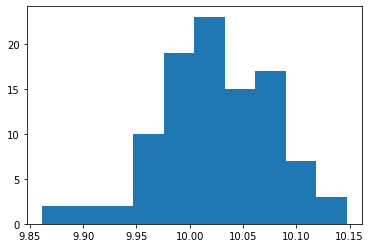

In [5]:
# Here is a histogram with the default settings
plt.hist(g_arr)
plt.show()

<font color='darkred'>This default histogram (with 10 bins) looks good (in this default x range). You can experiment with different numbers of bins. I would say 5-20 range looks OK. Too few or too many bins, it is hard to see what is going on.</font>

2 bins


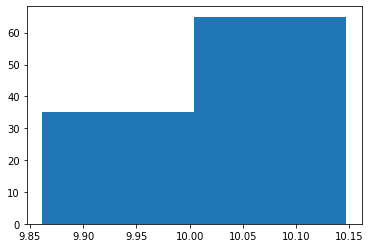

5 bins


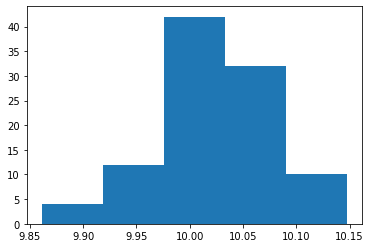

10 bins (default)


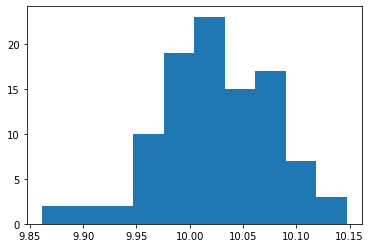

20 bins


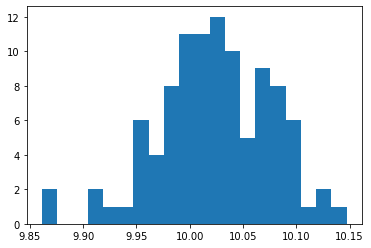

100 bins


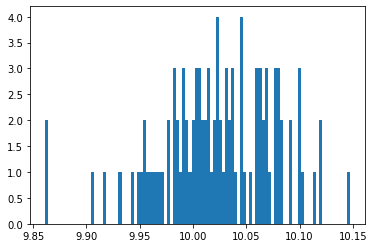

In [6]:
# Here are histograms with different numbers of bins

print('2 bins')
plt.hist(g_arr,bins=2)
plt.show()

print('5 bins')
plt.hist(g_arr,bins=5)
plt.show()

print('10 bins (default)')
plt.hist(g_arr,bins=10)
plt.show()

print('20 bins')
plt.hist(g_arr,bins=20)
plt.show()

print('100 bins')
plt.hist(g_arr,bins=100)
plt.show()

### <font color='darkred'>Solution to part (1b):</font>

<font color='darkred'>Let's try running the above code 10 times with $N=100$.</font>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(10):

    # Generate num samples for L and T
    num = 100
    L_arr = np.random.normal(0.855,0.002,num)
    T_arr = np.random.normal(1.835,0.005,num)

    # Compute samples for g
    g_arr = 4*np.pi**2 * L_arr/T_arr**2

    # Compute mean and std dev using numpy built-in functions
    print("mean and std dev are:", np.mean(g_arr), np.std(g_arr))

mean and std dev are: 10.034143318783709 0.06090514603933144
mean and std dev are: 10.032776404783139 0.051150838040612115
mean and std dev are: 10.024729720503327 0.05836419541580207
mean and std dev are: 10.019372440040422 0.05996136300202784
mean and std dev are: 10.03407977433373 0.05437946383105728
mean and std dev are: 10.020092792849168 0.053375611979263396
mean and std dev are: 10.026414726296773 0.05691233911704561
mean and std dev are: 10.034629598373405 0.06189722942143388
mean and std dev are: 10.014151192489079 0.052729878185427695
mean and std dev are: 10.024033809103267 0.06520299581781656


<font color='darkred'>The numbers are slightly different each time. If you only consider significant figures, sometimes you might get $g = 10.03 \pm 0.06$, sometimes $g = 10.04 \pm 0.07$, etc. </font>

<font color='darkred'>You want to make $N$ large enough so that these values converge at the level of significant figures. By trial and error, I find that $N=100000$ is sufficient to give consistently $$g=10.02 \pm 0.06\, .$$ Any number $N \ge 10^5$ is suitable (see below for 10 more runs with larger $N$).</font>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(10):

    # Generate num samples for L and T
    num = 100000
    L_arr = np.random.normal(0.855,0.002,num)
    T_arr = np.random.normal(1.835,0.005,num)

    # Compute samples for g
    g_arr = 4*np.pi**2 * L_arr/T_arr**2

    # Compute mean and std dev using numpy built-in functions
    print("mean and std dev are:", np.mean(g_arr), np.std(g_arr))

mean and std dev are: 10.024353885832504 0.05942398790120116
mean and std dev are: 10.024689277945601 0.05941763428766663
mean and std dev are: 10.024463791717396 0.05961274707403082
mean and std dev are: 10.024231310860067 0.05968263844083791
mean and std dev are: 10.024428543161106 0.05924832957088943
mean and std dev are: 10.024504088781013 0.059330540636903996
mean and std dev are: 10.024338526019578 0.059448155618540395
mean and std dev are: 10.024170254049928 0.059465513499711395
mean and std dev are: 10.024808805584465 0.05912389455007333
mean and std dev are: 10.02484415943 0.059590207159669645


<font color='darkred'>Let's make a histogram and compare to a normal distribution. Here we need to choose a larger number of bins (at least 20) and we need to set `density=True`.</font>

<font color='darkred'>They agree very well! Note setting a legend is optional (but good practice). For each plot, you set the keyword `label=str` where `str` is a string. Then you use the command `plt.legend()`.</font>

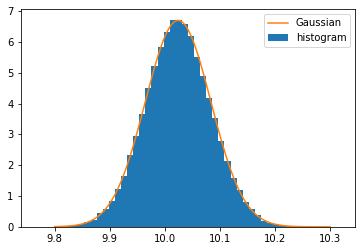

In [9]:
# Generate num samples for L and T
num = 100000
L_arr = np.random.normal(0.855,0.002,num)
T_arr = np.random.normal(1.835,0.005,num)

# Compute samples for g
g_arr = 4*np.pi**2 * L_arr/T_arr**2

# Compute mean and std dev using numpy built-in functions
mu = np.mean(g_arr)
sigma = np.std(g_arr)

# Make histogram
plt.hist(g_arr,bins=50,density=True,label='histogram')

# Plot Gaussian curve
x = np.linspace(9.8,10.3,num=100)
y = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*(x-mu)**2/sigma**2)
plt.plot(x,y,label='Gaussian')

plt.legend()

plt.show()


## <font color=#46769B>Part 2: Pendulum continued</font>

Here we will consider the same example with an extra source of systematic error.

Suppose we learn that the timing setup used for measuring the period $T$ may suffer from a uniform time delay $\delta T$ from starting and stopping. That is, oscillation formula becomes
$$T_0 = 2\pi \sqrt{L/g}$$
where $T_0 = T + \delta T$ is the *true* oscillation period and $T$ is the quantity we measure (given above). 

Suppose we know that $\delta T$ is between $0-0.05$ s, but is otherwise unknown and all values in this range are equally likely. It makes sense to sample $\delta T$ from a uniform distribution in the range $[0,0.05]$.

- Using the values quoted above for $T$ and $L$, and including $\delta T$ in your analysis, determine the mean value and uncertainty for $g$ (choose $N$ large enough so that these values have converged).

- Compare your histogram for $g$ to a normal distribution of mean $\mu=\langle g \rangle$ and standard deviation $\sigma = \Delta g$. (Make a plot of the normal distribution on top of the histogram.)

### <font color='darkred'>Solution:</font>

<font color='darkred'>I find, up to significant figures, 
$$g = 9.76 \pm 0.16\, .$$
Here are 10 simulations performed with $N=10000$. (Any value $N \ge 5000$ is sufficient.) </font>



In [10]:
# Your answer to exercise 2 here

# Run 10 simulations with N=10000
for i in range(10):

    # Generate num samples for L, T, and delta_T
    num = 10000
    L_arr = np.random.normal(0.855,0.002,num)
    T_arr = np.random.normal(1.835,0.005,num)
    delta_T_arr = 0.05*np.random.rand(num) # Note sample from uniform distirbution

    # Obtain samples for T0
    T0_arr = T_arr + delta_T_arr

    # Compute samples for g
    g_arr = 4*np.pi**2 * L_arr/T0_arr**2

    # Compute mean and std dev using numpy built-in functions
    mu = np.mean(g_arr)
    sigma = np.std(g_arr)
    print('mean and std dev are',mu,sigma)


mean and std dev are 9.757969660536489 0.1626632677757496
mean and std dev are 9.760564077312596 0.1621938239510559
mean and std dev are 9.760830078788887 0.16226668218923815
mean and std dev are 9.756922534136987 0.16098191631769188
mean and std dev are 9.755407094952455 0.16381820984811188
mean and std dev are 9.758821404970195 0.16235881967491575
mean and std dev are 9.759733479708034 0.1634595140705484
mean and std dev are 9.758003606108742 0.1626191666665561
mean and std dev are 9.758823994087079 0.1608153060532575
mean and std dev are 9.760746067977852 0.1629699073211169


<font color='darkred'>Now let's make the histogram. It is clear that the histogram is no long described by a Gaussian! This is due to the fact that $\delta T$ was not sampled from a Gaussian distribution. Note it is useful to choose a larger value of $N$.</font>


mean and std dev are 9.758659065278264 0.1621729873836829


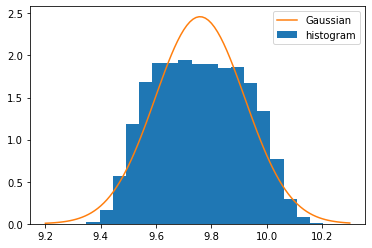

In [11]:
# Generate num samples for L, T, and delta_T
num = 100000
L_arr = np.random.normal(0.855,0.002,num)
T_arr = np.random.normal(1.835,0.005,num)
delta_T_arr = 0.05*np.random.rand(num) # Note sample from uniform distirbution

# Obtain samples for T0
T0_arr = T_arr + delta_T_arr

# Compute samples for g
g_arr = 4*np.pi**2 * L_arr/T0_arr**2

# Compute mean and std dev using numpy built-in functions
mu = np.mean(g_arr)
sigma = np.std(g_arr)
print('mean and std dev are',mu,sigma)

# Make histogram
plt.hist(g_arr,bins=20,density=True,label='histogram')

# Plot Gaussian curve
x = np.linspace(9.2,10.3,num=100)
y = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*(x-mu)**2/sigma**2)
plt.plot(x,y,label='Gaussian')

plt.legend()

plt.show()